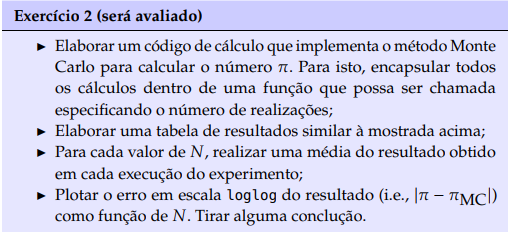

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_pi(num_pontos):
    x = np.random.rand(num_pontos)
    y = np.random.rand(num_pontos)
    raio = x**2 + y**2
    pi = 4* np.sum(np.int16(raio<1))/num_pontos
    
    return pi

#em linguagens interpretadas é melhor fazer códgos vetorizados ---> usa códigos pré-compilados

'''
def find_pi(num_pontos):
    Nc = 0
    for i in range(num_pontos):
        x = -1.0 + 2.0*np.random.rand()
        y = -1.0 + 2.0*np.random.rand()
        if (x**2 + y**2 < 1.0):
            Nc = Nc + 1
            
    return 4*(Nc/num_pontos)
    
'''

'\ndef find_pi(num_pontos):\n    Nc = 0\n    for i in range(num_pontos):\n        x = -1.0 + 2.0*np.random.rand()\n        y = -1.0 + 2.0*np.random.rand()\n        if (x**2 + y**2 < 1.0):\n            Nc = Nc + 1\n            \n    return 4*(Nc/num_pontos)\n    \n'

In [3]:
def find_avg_pi(num_pontos, num_iterations):
    pi_values = []
    for i in range(num_iterations):
        pi_values.append(find_pi(num_pontos))
    pi_values = np.array(pi_values)
    
    return (pi_values.mean(), pi_values.std(ddof=1))

In [4]:
num_pontos_list = [1e3, 1e4,1e5, 1e6, 1e7]
avg_pi_list = []
avg_pi_list_err = []

num_iterations = 10

for num_pontos in num_pontos_list:
    pi, pi_err = find_avg_pi(int(num_pontos), num_iterations)
    avg_pi_list.append(pi)
    avg_pi_list_err.append(pi_err)
    print("Feito " + str(num_pontos))


Feito 1000.0
Feito 10000.0
Feito 100000.0
Feito 1000000.0
Feito 10000000.0


In [5]:
avg_pi_list = np.array(avg_pi_list)
avg_pi_list_err = np.array(avg_pi_list_err)

[3.1388     3.1454     3.142528   3.1412904  3.14141628]


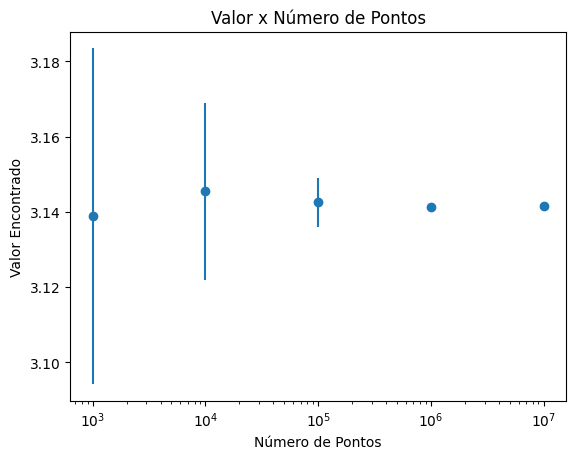

In [6]:
plt.errorbar(num_pontos_list, avg_pi_list, yerr=avg_pi_list_err, marker = 'o', ls = '')
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Valor Encontrado")
plt.title("Valor x Número de Pontos")

print(avg_pi_list)

Text(0.5, 1.0, 'Erro x Número de Pontos')

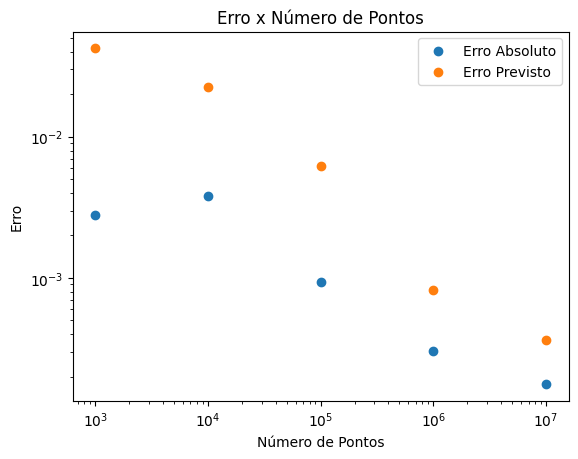

In [7]:
erro_absoluto = np.abs(avg_pi_list - np.pi)
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 #intervalo de confiança de 98%

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

Text(0.5, 1.0, 'Erro x Número de Pontos')

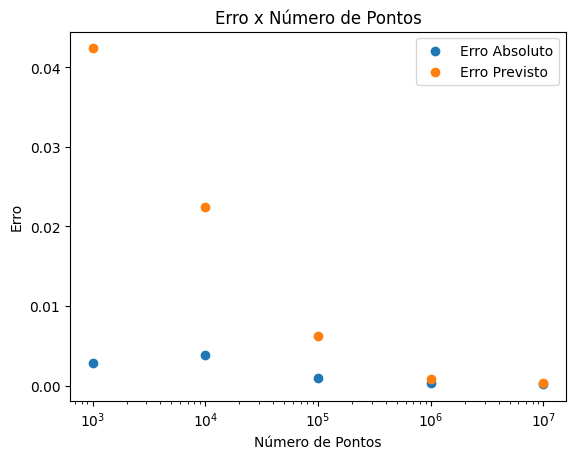

In [8]:
erro_absoluto = np.abs(avg_pi_list - np.pi)
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 #intervalo de confiança de 98%

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")